In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [134]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [135]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [136]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [137]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [138]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [139]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [140]:
X = df.drop('FWI',axis=1)
y = df['FWI']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

<Axes: >

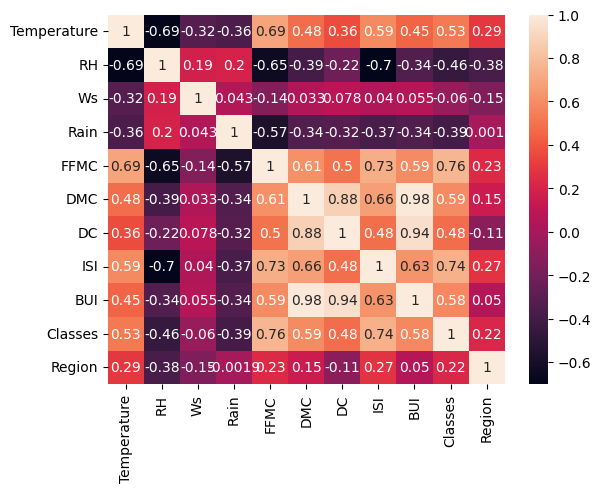

In [141]:
sns.heatmap(X_train.corr(),annot=True)

In [142]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [143]:
corr_features = correlation(X_train,0.85)

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [145]:
X_train_sc,X_test_sc

(array([[-0.301121  ,  0.06835876,  0.89673457, ...,  0.48086219,
          0.90566259, -1.01242284],
        [-1.98324518,  0.99672801, -0.58185068, ..., -1.07139989,
         -1.10416397, -1.01242284],
        [-0.301121  ,  0.53254338,  0.52708826, ...,  0.5286241 ,
          0.90566259,  0.9877296 ],
        ...,
        [ 0.25958707, -2.45150064, -0.95149699, ...,  2.27193383,
          0.90566259,  0.9877296 ],
        [-0.58147503,  0.06835876, -0.58185068, ..., -0.59378078,
         -1.10416397,  0.9877296 ],
        [-1.14218309,  1.0630401 , -1.3211433 , ..., -0.80870938,
         -1.10416397, -1.01242284]], shape=(162, 9)),
 array([[-8.61829059e-01,  4.66231295e-01, -5.81850675e-01,
         -4.24064583e-01,  3.74594357e-01, -4.06694465e-01,
         -3.54971234e-01,  9.05662586e-01, -1.01242284e+00],
        [-8.61829059e-01, -9.26322582e-01,  1.26638088e+00,
         -4.24064583e-01,  7.58044470e-01, -2.28559462e-01,
          1.05400512e+00,  9.05662586e-01,  9.87729597e-

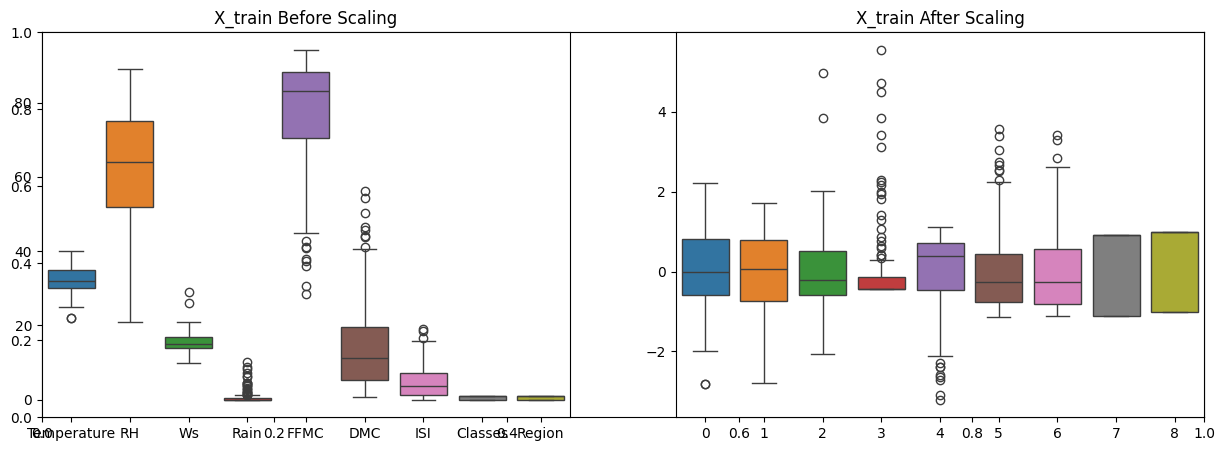

In [146]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_sc)
plt.title('X_train After Scaling')
plt.show()

In [147]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Linear Regression

Mean absolute error:  0.6562931843633071
R2:  0.9870831620084868


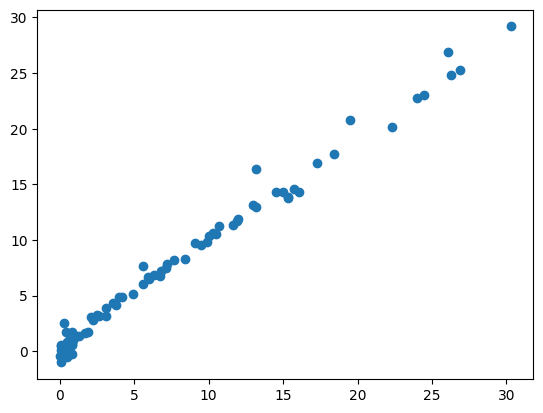

In [148]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_sc,y_train)
y_pred = lr.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

### Ridge Regression

Mean absolute error:  0.6781225131218197
R2:  0.9863698710809672


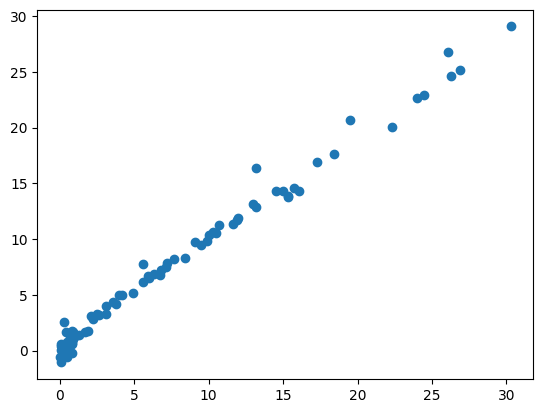

In [149]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_sc,y_train)
y_pred = ridge.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

Mean absolute error:  0.6781225131218982
R2:  0.9863698710809582


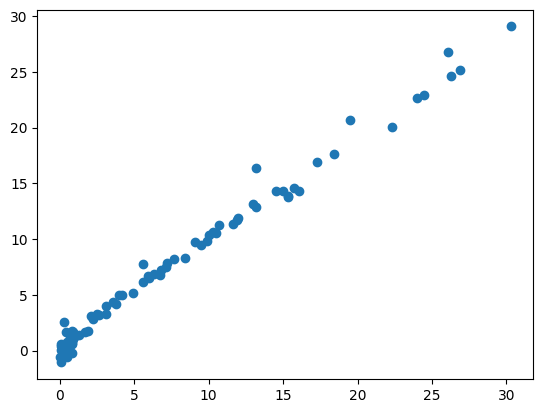

In [150]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(X_train_sc,y_train)
y_pred = ridgecv.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

### Lasso Regression

Mean absolute error:  1.3199947825749143
R2:  0.9489776696889856


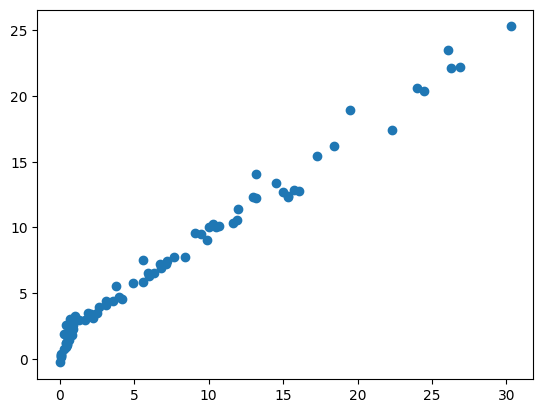

In [151]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_sc,y_train)
y_pred = lasso.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

Mean absolute error:  0.6564807091902248
R2:  0.98699063233565


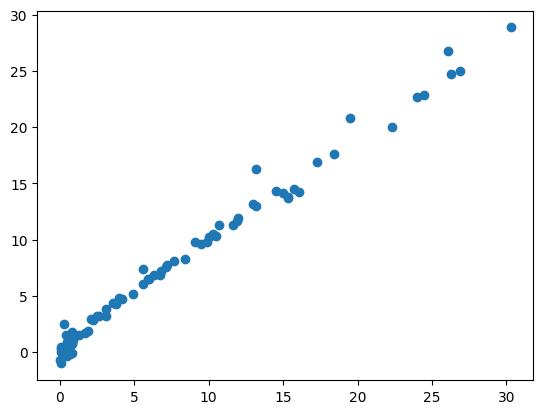

In [152]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(X_train_sc,y_train)
y_pred = lassocv.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

### ElasticNet Regression

Mean absolute error:  2.02562054995965
R2:  0.8818928076695921


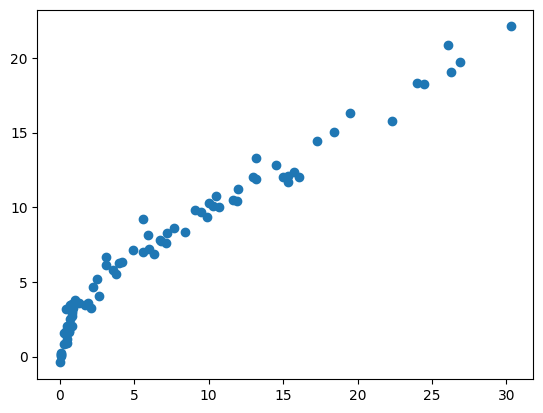

In [154]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train_sc,y_train)
y_pred = en.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)

Mean absolute error:  0.7013189950718118
R2:  0.9854835731487825


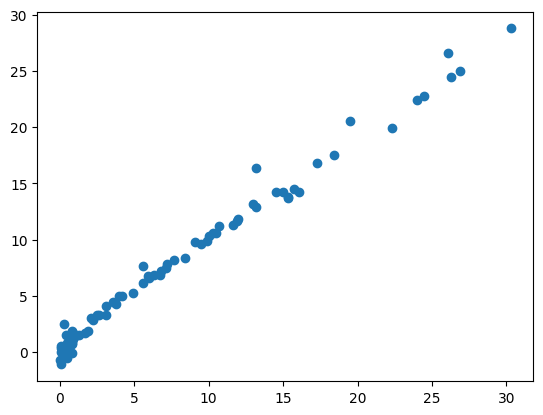

In [155]:
from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV()
encv.fit(X_train_sc,y_train)
y_pred = encv.predict(X_test_sc)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error: ',mae)
print('R2: ',score)
plt.scatter(y_test,y_pred)